# Crop Recommendation

## Problem Statement
>Make informed decisions about which crops to cultivate based on various factors such as climate conditions and soil characteristics.

## Data
>https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

## Features
>`N` - ratio of Nitrogen content in soil<br>
`P` - ratio of Phosphorous content in soil<br>
`K` - ratio of Potassium content in soil<br>
`temperature` - temperature in degree Celsius<br>
`humidity` - relative humidity in %<br>
`ph` - ph value of the soil<br>
`rainfall` - rainfall in mm<br>

In [1]:
import numpy as np

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import pickle

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.size

17600

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df2 = df[df["N"]<=10]
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
304,2,61,20,22.139747,23.022511,5.955617,76.641283,kidneybeans
315,6,77,25,20.611622,24.363141,5.792745,69.638339,kidneybeans
318,10,55,23,21.188532,19.634386,5.728233,137.194863,kidneybeans
333,9,77,17,20.123733,24.452026,5.783425,106.158201,kidneybeans
334,1,62,23,15.435461,18.374779,5.607808,139.030203,kidneybeans


In [8]:
df2.shape

(286, 8)

In [9]:
# df["N"].replace(to_replace=df["N"]<=10,value=df["N"].mean(),inplace=True)
df.loc[(df["N"]<10,"N")] = df["N"].mean()

In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,56.047127,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,32.861675,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,10.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,29.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,50.551818,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


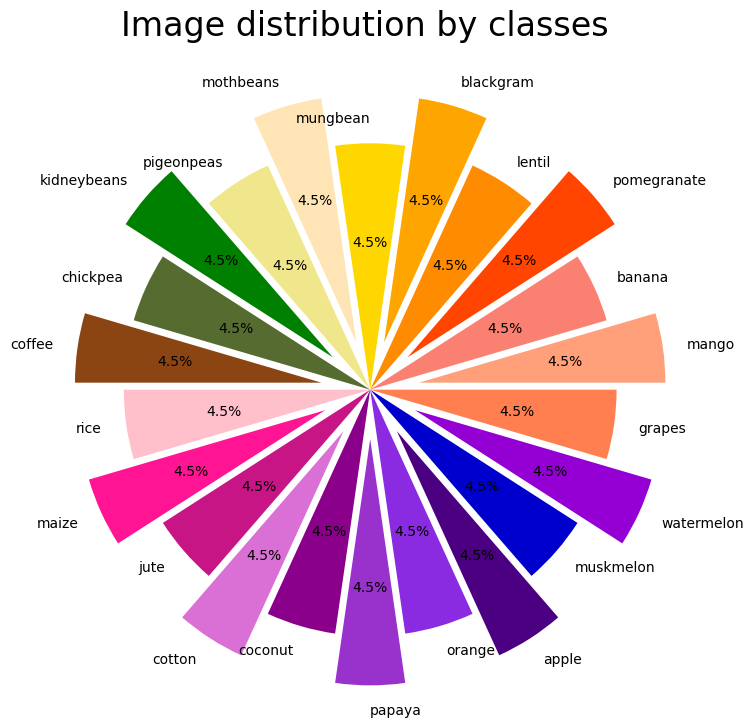

In [11]:
df_for_pie = df.label.value_counts().reset_index()
colors = ['#FFC0CB', '#FF1493', '#C71585', '#DA70D6', '#8B008B', '#9932CC', '#8A2BE2', '#4B0082', '#0000CD', '#9400D3', '#FF7F50', '#FFA07A', '#FA8072', '#FF4500', '#FF8C00', '#FFA500', '#FFD700', '#FFE4B5', '#F0E68C', '#008000', '#556B2F', '#8B4513']
explode = (0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2, 0, 0.2)
ax = plt.figure(figsize=(10,8))
plt.pie(df_for_pie['label'], labels=df_for_pie['index'], colors=colors, explode=explode, autopct='%1.1f%%', startangle=180)
plt.title('Image distribution by classes \n', size=24)
plt.show()

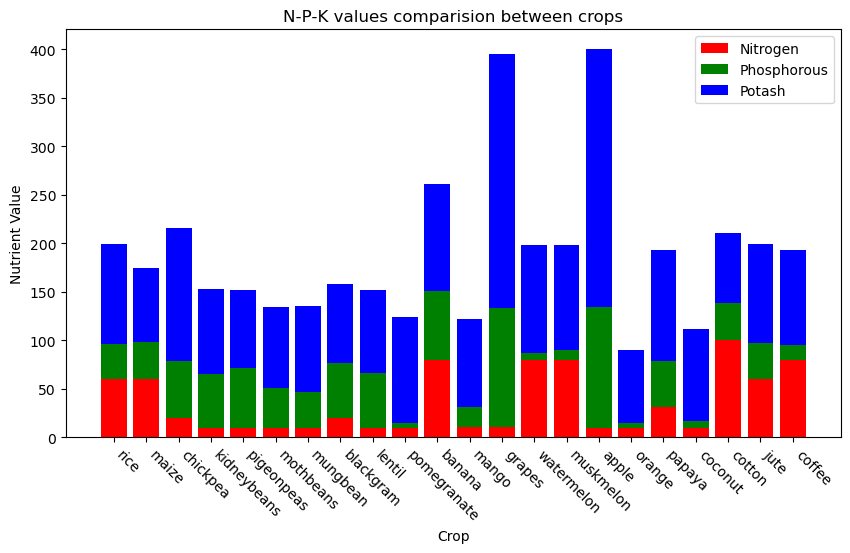

In [12]:
x = df.label
y1 = df['N']
y2 = df['P']
y3 = df['K']

color1 = 'red'
color2 = 'green'
color3 = 'blue'

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y1, color=color1, label='Nitrogen')
ax.bar(x, y2, color=color2, bottom=y1, label='Phosphorous')
ax.bar(x, y3, color=color3, bottom=y1+y2, label='Potash')

ax.set_title("N-P-K values comparision between crops")
ax.set_xlabel("Crop")
ax.set_ylabel("Nutrient Value")
plt.xticks(rotation=-45, ha='left', va='top') 

ax.legend()
plt.subplots_adjust(bottom=0.2) 
plt.show()

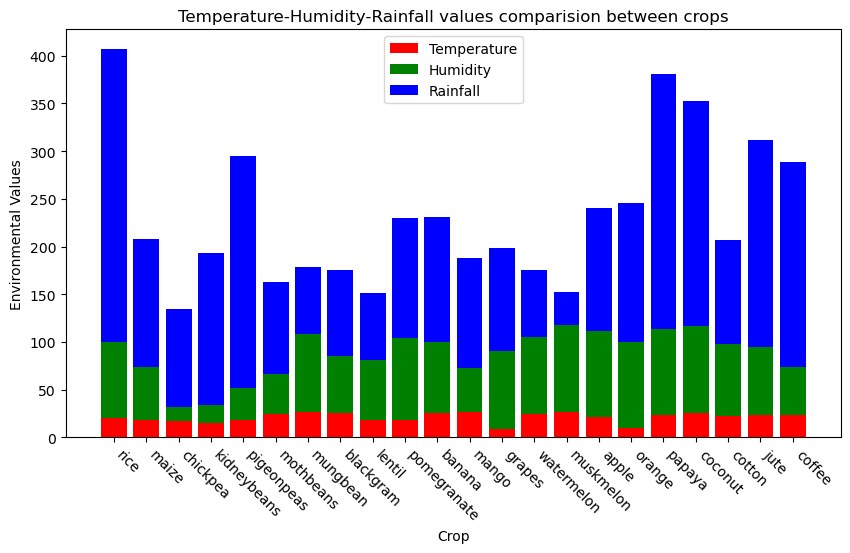

In [13]:
x = df.label
y1 = df['temperature']
y2 = df['humidity']
y3 = df['rainfall']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y1, color=color1, label='Temperature')
ax.bar(x, y2, color=color2, bottom=y1, label='Humidity')
ax.bar(x, y3, color=color3, bottom=y1+y2, label='Rainfall')

ax.set_title("Temperature-Humidity-Rainfall values comparision between crops")
ax.set_xlabel("Crop")
ax.set_ylabel("Environmental Values")
plt.xticks(rotation=-45, ha='left', va='top') 


ax.legend()
plt.subplots_adjust(bottom=0.2) 
plt.show()

In [14]:
le = LabelEncoder()
df["label"]=le.fit_transform(df['label'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [15]:
x = df.drop("label",axis=1).astype(float)
y = df["label"]

x_train,x_test,y_train,y_test = train_test_split(x,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

In [16]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [17]:
y

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: label, Length: 2200, dtype: int64

In [18]:
param_distribution_rand_forests = {'n_estimators': range(5, 20),
                                   'max_depth': range(3, 30)}

model = GridSearchCV(RandomForestClassifier(),
                     param_distribution_rand_forests,
                     scoring='balanced_accuracy',
                     n_jobs=-1)

model.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 30),
                         'n_estimators': range(5, 20)},
             scoring='balanced_accuracy')

In [19]:
model.best_params_

{'max_depth': 11, 'n_estimators': 16}

In [20]:
y_pred=model.predict(x_test)

In [21]:
accuracy_score(y_pred,y_test)

0.990909090909091

In [22]:
model = LogisticRegression()
model.fit(x_train, y_train)

/Users/aniketgaldhar/Desktop/ml/nlp/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred=model.predict(x_test)

In [24]:
y_pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
        6, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 18, 18,  4, 15, 11, 13,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17,  2, 16, 20,
       15, 18, 15,  4,  8,  1, 10, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3, 13,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9,  2, 14, 10, 21,
       14,  2,  2, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4,  8, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
       18,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [25]:
accuracy_score(y_pred,y_test)

0.925

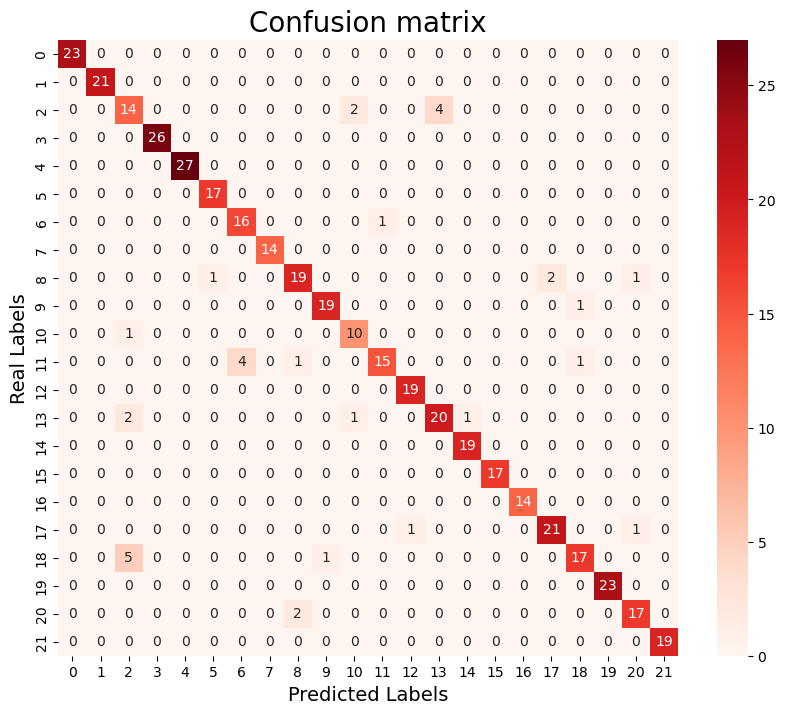

In [26]:
cm = confusion_matrix(y_test,y_pred)

ax = plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.title('Confusion matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Real Labels', size=14)
plt.show()

In [27]:
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [28]:
## Let's Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout
from tensorflow import keras

2023-07-20 23:51:48.085020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
classifier=Sequential()
classifier.add(Dense(64,activation='relu', input_dim=7))
classifier.add(Dense(64,activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(64,activation='relu'))
classifier.add(Dense(activation='softmax', units=22))

2023-07-20 23:51:57.665836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [30]:
classifier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
## Early Stoping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [32]:
history = classifier.fit(x_train,y_train,validation_split=0.10,batch_size=10,epochs=500)

Epoch 1/500
159/159 [==============================] - 1s 2ms/step - loss: 6.0904 - accuracy: 0.1768 - val_loss: 1.6020 - val_accuracy: 0.6023
Epoch 2/500
159/159 [==============================] - 0s 839us/step - loss: 1.8221 - accuracy: 0.4009 - val_loss: 1.1267 - val_accuracy: 0.6705
Epoch 3/500
159/159 [==============================] - 0s 865us/step - loss: 1.4383 - accuracy: 0.5208 - val_loss: 0.7239 - val_accuracy: 0.8352
Epoch 4/500
159/159 [==============================] - 0s 800us/step - loss: 1.1819 - accuracy: 0.5966 - val_loss: 0.6033 - val_accuracy: 0.8580
Epoch 5/500
159/159 [==============================] - 0s 825us/step - loss: 1.1089 - accuracy: 0.6351 - val_loss: 0.5188 - val_accuracy: 0.8466
Epoch 6/500
159/159 [==============================] - 0s 1ms/step - loss: 0.9511 - accuracy: 0.6591 - val_loss: 0.4778 - val_accuracy: 0.8580
Epoch 7/500
159/159 [==============================] - 0s 798us/step - loss: 0.8980 - accuracy: 0.6648 - val_loss: 0.4292 - val_accura

159/159 [==============================] - 0s 812us/step - loss: 0.3226 - accuracy: 0.8883 - val_loss: 0.1148 - val_accuracy: 0.9432
Epoch 58/500
159/159 [==============================] - 0s 796us/step - loss: 0.3007 - accuracy: 0.8965 - val_loss: 0.1078 - val_accuracy: 0.9602
Epoch 59/500
159/159 [==============================] - 0s 792us/step - loss: 0.2612 - accuracy: 0.9059 - val_loss: 0.1093 - val_accuracy: 0.9489
Epoch 60/500
159/159 [==============================] - 0s 793us/step - loss: 0.2851 - accuracy: 0.8996 - val_loss: 0.1279 - val_accuracy: 0.9489
Epoch 61/500
159/159 [==============================] - 0s 794us/step - loss: 0.2914 - accuracy: 0.8952 - val_loss: 0.1476 - val_accuracy: 0.9489
Epoch 62/500
159/159 [==============================] - 0s 800us/step - loss: 0.2454 - accuracy: 0.9192 - val_loss: 0.1202 - val_accuracy: 0.9489
Epoch 63/500
159/159 [==============================] - 0s 791us/step - loss: 0.2826 - accuracy: 0.8927 - val_loss: 0.1494 - val_accuracy

159/159 [==============================] - 0s 799us/step - loss: 0.1820 - accuracy: 0.9375 - val_loss: 0.1400 - val_accuracy: 0.9545
Epoch 114/500
159/159 [==============================] - 0s 785us/step - loss: 0.1806 - accuracy: 0.9318 - val_loss: 0.0932 - val_accuracy: 0.9602
Epoch 115/500
159/159 [==============================] - 0s 787us/step - loss: 0.1484 - accuracy: 0.9463 - val_loss: 0.0925 - val_accuracy: 0.9830
Epoch 116/500
159/159 [==============================] - 0s 791us/step - loss: 0.1926 - accuracy: 0.9350 - val_loss: 0.0663 - val_accuracy: 0.9886
Epoch 117/500
159/159 [==============================] - 0s 796us/step - loss: 0.1741 - accuracy: 0.9350 - val_loss: 0.0747 - val_accuracy: 0.9773
Epoch 118/500
159/159 [==============================] - 0s 793us/step - loss: 0.1526 - accuracy: 0.9463 - val_loss: 0.1224 - val_accuracy: 0.9545
Epoch 119/500
159/159 [==============================] - 0s 795us/step - loss: 0.1795 - accuracy: 0.9407 - val_loss: 0.1655 - val_ac

Epoch 169/500
159/159 [==============================] - 0s 852us/step - loss: 0.1499 - accuracy: 0.9426 - val_loss: 0.0896 - val_accuracy: 0.9659
Epoch 170/500
159/159 [==============================] - 0s 785us/step - loss: 0.1736 - accuracy: 0.9343 - val_loss: 0.1108 - val_accuracy: 0.9545
Epoch 171/500
159/159 [==============================] - 0s 794us/step - loss: 0.1400 - accuracy: 0.9432 - val_loss: 0.0921 - val_accuracy: 0.9602
Epoch 172/500
159/159 [==============================] - 0s 789us/step - loss: 0.1464 - accuracy: 0.9432 - val_loss: 0.0725 - val_accuracy: 0.9773
Epoch 173/500
159/159 [==============================] - 0s 794us/step - loss: 0.1580 - accuracy: 0.9438 - val_loss: 0.0899 - val_accuracy: 0.9602
Epoch 174/500
159/159 [==============================] - 0s 792us/step - loss: 0.1506 - accuracy: 0.9432 - val_loss: 0.0950 - val_accuracy: 0.9545
Epoch 175/500
159/159 [==============================] - 0s 789us/step - loss: 0.1484 - accuracy: 0.9451 - val_loss: 0

Epoch 225/500
159/159 [==============================] - 0s 793us/step - loss: 0.1220 - accuracy: 0.9533 - val_loss: 0.0626 - val_accuracy: 0.9773
Epoch 226/500
159/159 [==============================] - 0s 788us/step - loss: 0.1596 - accuracy: 0.9463 - val_loss: 0.1095 - val_accuracy: 0.9659
Epoch 227/500
159/159 [==============================] - 0s 972us/step - loss: 0.1587 - accuracy: 0.9489 - val_loss: 0.1000 - val_accuracy: 0.9602
Epoch 228/500
159/159 [==============================] - 0s 790us/step - loss: 0.1136 - accuracy: 0.9590 - val_loss: 0.1080 - val_accuracy: 0.9602
Epoch 229/500
159/159 [==============================] - 0s 795us/step - loss: 0.1199 - accuracy: 0.9539 - val_loss: 0.1229 - val_accuracy: 0.9318
Epoch 230/500
159/159 [==============================] - 0s 788us/step - loss: 0.1456 - accuracy: 0.9482 - val_loss: 0.1531 - val_accuracy: 0.9489
Epoch 231/500
159/159 [==============================] - 0s 796us/step - loss: 0.1117 - accuracy: 0.9615 - val_loss: 0

Epoch 281/500
159/159 [==============================] - 0s 794us/step - loss: 0.1177 - accuracy: 0.9577 - val_loss: 0.1241 - val_accuracy: 0.9375
Epoch 282/500
159/159 [==============================] - 0s 793us/step - loss: 0.1605 - accuracy: 0.9564 - val_loss: 0.0814 - val_accuracy: 0.9602
Epoch 283/500
159/159 [==============================] - 0s 790us/step - loss: 0.1248 - accuracy: 0.9457 - val_loss: 0.1207 - val_accuracy: 0.9489
Epoch 284/500
159/159 [==============================] - 0s 792us/step - loss: 0.1574 - accuracy: 0.9438 - val_loss: 0.1570 - val_accuracy: 0.9318
Epoch 285/500
159/159 [==============================] - 0s 790us/step - loss: 0.1632 - accuracy: 0.9482 - val_loss: 0.1090 - val_accuracy: 0.9489
Epoch 286/500
159/159 [==============================] - 0s 809us/step - loss: 0.1481 - accuracy: 0.9514 - val_loss: 0.0744 - val_accuracy: 0.9773
Epoch 287/500
159/159 [==============================] - 0s 793us/step - loss: 0.1057 - accuracy: 0.9609 - val_loss: 0

Epoch 337/500
159/159 [==============================] - 0s 789us/step - loss: 0.0920 - accuracy: 0.9609 - val_loss: 0.1399 - val_accuracy: 0.9318
Epoch 338/500
159/159 [==============================] - 0s 787us/step - loss: 0.1183 - accuracy: 0.9583 - val_loss: 0.1519 - val_accuracy: 0.9432
Epoch 339/500
159/159 [==============================] - 0s 796us/step - loss: 0.1278 - accuracy: 0.9514 - val_loss: 0.1330 - val_accuracy: 0.9489
Epoch 340/500
159/159 [==============================] - 0s 789us/step - loss: 0.1182 - accuracy: 0.9545 - val_loss: 0.1824 - val_accuracy: 0.9261
Epoch 341/500
159/159 [==============================] - 0s 789us/step - loss: 0.0905 - accuracy: 0.9621 - val_loss: 0.1407 - val_accuracy: 0.9205
Epoch 342/500
159/159 [==============================] - 0s 785us/step - loss: 0.1184 - accuracy: 0.9621 - val_loss: 0.1137 - val_accuracy: 0.9659
Epoch 343/500
159/159 [==============================] - 0s 783us/step - loss: 0.0915 - accuracy: 0.9697 - val_loss: 0

Epoch 393/500
159/159 [==============================] - 0s 797us/step - loss: 0.1068 - accuracy: 0.9640 - val_loss: 0.1899 - val_accuracy: 0.9148
Epoch 394/500
159/159 [==============================] - 0s 783us/step - loss: 0.0969 - accuracy: 0.9615 - val_loss: 0.1572 - val_accuracy: 0.9375
Epoch 395/500
159/159 [==============================] - 0s 790us/step - loss: 0.1213 - accuracy: 0.9520 - val_loss: 0.1274 - val_accuracy: 0.9432
Epoch 396/500
159/159 [==============================] - 0s 788us/step - loss: 0.0962 - accuracy: 0.9602 - val_loss: 0.1504 - val_accuracy: 0.9545
Epoch 397/500
159/159 [==============================] - 0s 789us/step - loss: 0.0817 - accuracy: 0.9710 - val_loss: 0.1090 - val_accuracy: 0.9602
Epoch 398/500
159/159 [==============================] - 0s 788us/step - loss: 0.0767 - accuracy: 0.9653 - val_loss: 0.1937 - val_accuracy: 0.9318
Epoch 399/500
159/159 [==============================] - 0s 777us/step - loss: 0.0977 - accuracy: 0.9621 - val_loss: 0

Epoch 449/500
159/159 [==============================] - 0s 800us/step - loss: 0.1018 - accuracy: 0.9646 - val_loss: 0.1604 - val_accuracy: 0.9432
Epoch 450/500
159/159 [==============================] - 0s 786us/step - loss: 0.1117 - accuracy: 0.9640 - val_loss: 0.1414 - val_accuracy: 0.9602
Epoch 451/500
159/159 [==============================] - 0s 788us/step - loss: 0.0935 - accuracy: 0.9672 - val_loss: 0.1416 - val_accuracy: 0.9602
Epoch 452/500
159/159 [==============================] - 0s 790us/step - loss: 0.0946 - accuracy: 0.9634 - val_loss: 0.1839 - val_accuracy: 0.9432
Epoch 453/500
159/159 [==============================] - 0s 789us/step - loss: 0.0991 - accuracy: 0.9665 - val_loss: 0.1624 - val_accuracy: 0.9432
Epoch 454/500
159/159 [==============================] - 0s 793us/step - loss: 0.1386 - accuracy: 0.9571 - val_loss: 0.1235 - val_accuracy: 0.9432
Epoch 455/500
159/159 [==============================] - 0s 791us/step - loss: 0.0950 - accuracy: 0.9678 - val_loss: 0

In [33]:
y_pred = classifier.predict(x_test)

14/14 [==============================] - 0s 609us/step


In [34]:
y_pred

array([[4.71306173e-32, 0.00000000e+00, 0.00000000e+00, ...,
        3.24383337e-34, 1.25439620e-37, 1.08329016e-13],
       [7.03680937e-26, 7.23615588e-33, 0.00000000e+00, ...,
        1.64890498e-21, 2.13171368e-25, 1.00000000e+00],
       [3.32425920e-10, 1.24547248e-11, 2.54745985e-15, ...,
        3.77452458e-10, 2.30773317e-11, 6.24949336e-15],
       ...,
       [1.26019079e-19, 6.20373416e-17, 1.38639863e-10, ...,
        1.73349958e-17, 6.22569623e-14, 2.30324932e-08],
       [5.08601562e-17, 6.24272389e-13, 6.57524568e-09, ...,
        7.91026993e-14, 1.74410677e-11, 4.16243802e-06],
       [1.96444834e-16, 6.79770625e-26, 2.56925540e-11, ...,
        4.80486216e-16, 2.21499530e-09, 4.31971702e-25]], dtype=float32)

In [35]:
import numpy as np
classifier.predict(x_train[0:1])
val=classifier.predict(x_train[0:1])
max = np.max(val)
maxval=np.where(val==max)
print(maxval)
# x_train[1:2]

1/1 [==============================] - 0s 20ms/step
(array([0]), array([16]))


In [36]:
y_train[0:1]

1656    16
Name: label, dtype: int64

In [37]:
# filename = 'classifier.sav'
# pickle.dump(classifier, open(filename, 'wb'))

In [38]:
x_train[0:1]

,N,P,K,temperature,humidity,ph,rainfall
1656,17.0,16.0,14.0,16.396243,92.181519,6.625539,102.944161


In [39]:
classifier.predict(x_train[0:1])

1/1 [==============================] - 0s 17ms/step


array([[0.0000000e+00, 0.0000000e+00, 1.2824883e-30, 8.5445850e-38,
        1.1780753e-25, 0.0000000e+00, 3.3383114e-34, 1.1910226e-30,
        0.0000000e+00, 0.0000000e+00, 1.6429685e-32, 0.0000000e+00,
        0.0000000e+00, 7.1582390e-33, 1.6244669e-23, 1.6717360e-30,
        1.0000000e+00, 1.7402716e-33, 2.9002803e-31, 4.0091126e-28,
        1.0304646e-31, 0.0000000e+00]], dtype=float32)

In [40]:
y_train[0:1]

1656    16
Name: label, dtype: int64

In [41]:
val=classifier.predict(x_train[0:1])
max_class = np.argmax(val, axis=1)
print(max_class)
# x_train[1:2]

1/1 [==============================] - 0s 17ms/step
[16]


In [42]:
classifier.predict(x_train[13:14])

1/1 [==============================] - 0s 17ms/step


array([[9.9999976e-01, 4.8199622e-13, 1.5231567e-35, 5.4373719e-12,
        4.7004454e-14, 2.1374790e-32, 2.3131586e-25, 4.1033971e-08,
        5.8271911e-22, 4.9509305e-36, 1.8107422e-33, 0.0000000e+00,
        5.7449634e-33, 0.0000000e+00, 1.7069892e-33, 1.1532124e-22,
        3.9315035e-23, 1.9963613e-07, 1.0493554e-29, 5.6019030e-22,
        4.7931142e-15, 6.7316616e-30]], dtype=float32)

In [43]:
y_train[13:14]

1503    0
Name: label, dtype: int64

In [44]:
val=classifier.predict(x_train[13:14])
max = np.max(val)
maxval=np.where(val==max)
print(maxval)
# x_train[1:2]

1/1 [==============================] - 0s 18ms/step
(array([0]), array([0]))


In [45]:
x_train
x_train.to_csv("x_train.csv")

In [46]:
df2 = df[df["label"]==0]
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1500,24.000000,128,196,22.750888,90.694892,5.521467,110.431786,0
1501,50.551818,144,197,23.849401,94.348150,6.133221,114.051249,0
1502,14.000000,128,205,22.608010,94.589006,6.226290,116.039659,0
1503,50.551818,120,201,21.186674,91.134357,6.321152,122.233323,0
1504,20.000000,129,201,23.410447,91.699133,5.587906,116.077793,0


In [47]:
# keras.save(classifier,'classifier1.pth')
# classifier.save('my_modal.h5')

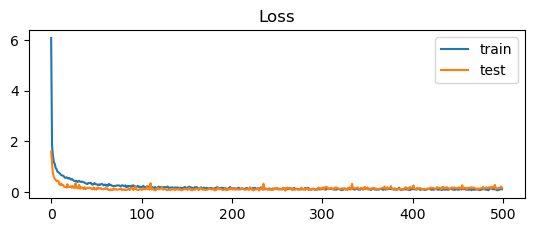

In [48]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

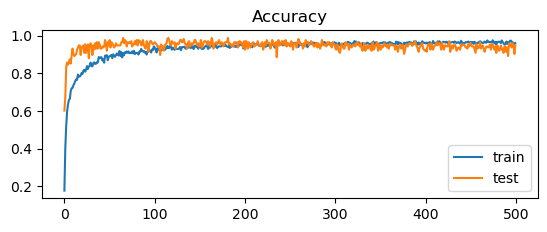

In [49]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [50]:
y_pred = model.predict(x_test)               ## xtest => test image

In [51]:
y_pred

array([15, 21, 17, 17,  0, 12,  0, 13, 14, 10,  2,  4, 19,  8,  4, 19,  0,
        6, 17, 15,  5, 17, 16, 17,  3,  8, 14, 16, 18, 20, 19, 13,  8, 10,
        8,  2,  8,  3,  3,  9, 17, 12,  2, 11, 14, 18, 18,  4, 15, 11, 13,
        5,  7, 14,  5,  9,  6,  0,  1,  2, 21,  4, 10, 16, 17,  2, 16, 20,
       15, 18, 15,  4,  8,  1, 10, 17,  1,  6, 21, 16,  5,  3, 20, 13, 16,
       12,  5, 13,  2, 19, 11, 13,  6, 17, 18, 13,  9,  5,  2, 10,  4, 20,
       16, 15, 21,  9, 21,  1, 18, 13,  1,  8,  6, 19, 18,  3, 11,  4, 19,
       20, 18,  7,  2,  4,  3, 13,  4, 11,  1, 13,  1,  9, 19,  3,  4, 16,
       18,  1,  1,  0,  9, 15, 14, 13,  4, 11,  0,  4,  9,  2, 14, 10, 21,
       14,  2,  2, 18,  9, 11,  8,  3,  0, 16,  6, 20,  4,  7, 10, 21,  7,
        7,  2, 19,  3,  4,  8, 10,  7, 21,  8,  5,  5,  9,  8, 13,  9,  1,
       18,  4, 17, 17, 14, 12, 19, 21,  9, 11,  0,  2,  3,  7,  7,  1,  6,
       20, 19, 14,  1,  8, 14, 11,  3,  3,  3,  0, 20,  9, 17,  5,  2,  9,
       12, 12,  4, 17,  0

In [52]:
score=accuracy_score(y_test,y_pred)

In [53]:
score

0.925

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.64      0.70      0.67        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.80      0.94      0.86        17
           7       1.00      1.00      1.00        14
           8       0.86      0.83      0.84        23
           9       0.95      0.95      0.95        20
          10       0.77      0.91      0.83        11
          11       0.94      0.71      0.81        21
          12       0.95      1.00      0.97        19
          13       0.83      0.83      0.83        24
          14       0.95      1.00      0.97        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       0.91    

In [55]:
feature_dict = dict(zip(df.columns, list(model.coef_[0])))
feature_dict

{'N': -0.7440293140686403,
 'P': 0.42128467734339375,
 'K': 1.285907933620371,
 'temperature': -0.27766743390705634,
 'humidity': -0.2809425380389978,
 'ph': -0.07246690834519383,
 'rainfall': -0.4419626284956278}

<Axes: >

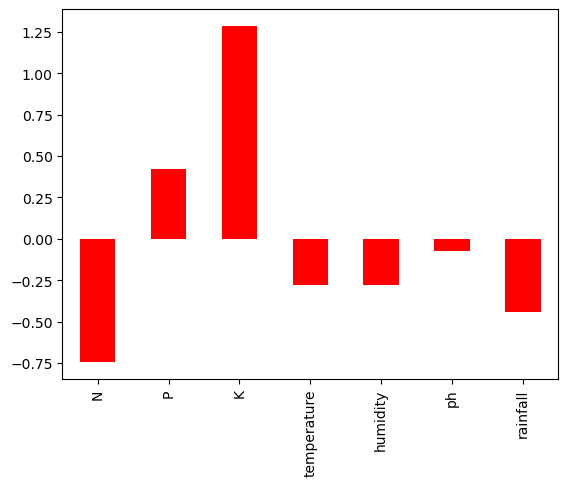

In [56]:
features = pd.DataFrame(feature_dict, index=[0])
features.T.plot.bar(legend = False, color="red")